# Testing On Random Playlist

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import ndcg_score
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
unique_artists_df = pd.read_pickle('unique_artists_df.pkl')
playlists_genres_df = pd.read_pickle('playlists_genres_df.pkl')
playlist_genres_dup= pd.read_pickle('playlist_genres_dup.pkl')
tracks_df = pd.read_csv('tracks_df.csv')
common_genres = np.load("common_genres.npy", allow_pickle=True)
common_genres = common_genres.tolist()
artist_vectors = np.load("artist_vectors.npy", allow_pickle=True)

In [17]:
len(

track_uri                track_name  \
0  spotify:track:7gKIt3rDGIMJDFVSPBnGmj                Super Bass   
1  spotify:track:2eAAEa8pxKF7My0EO4rFgR     Blow Your Mind (Mwah)   
2  spotify:track:7fwXWKdDNI5IutOMc5OKYw  Mi Gente (feat. Beyoncé)   

   artist_name                             artist_uri  \
0  Nicki Minaj  spotify:artist:0hCNtLu0JehylgoiP8L4Gh   
1     Dua Lipa  spotify:artist:6M2wZ9GZgrQXHCFfjv46we   
2     J Balvin  spotify:artist:1vyhD5VmyZ7KMfW5gqLgo5   

                              album_uri                album_name  \
0  spotify:album:2RfF6dGpYIN5u1mNkfG8Pb               Pink Friday   
1  spotify:album:01sfgrNbnnPUEyz6GZYlt9                  Dua Lipa   
2  spotify:album:0ARVq1kA5eRP4F5VsZsr3m  Mi Gente (feat. Beyoncé)   

                                type-id  \
0  b6e035f4-3ce9-331c-97df-83397230b0df   
1  b6e035f4-3ce9-331c-97df-83397230b0df   
2  b6e035f4-3ce9-331c-97df-83397230b0df   

                                                tags  \
0  [{'count': 1, 'name': '2010s'}, {'name': 'east...   
1  [{'name': 'alternative pop', 'count': 1}, {'na...   
2  [{'count': 6, 'name': 'hip hop'}, {'count': 5,...   

                                              genres  
0  [2010s, east coast hip hop, electronic, hip ho...  
1  [alternative pop, contemporary r&b, dance-pop,...  
2        [hip hop, latin, latin pop, pop, reggaeton]

In [39]:
from collections import Counter
all_genres = [genre for sublist in playlist_genres_dup['genres'] for genre in sublist]
genre_counts = Counter(all_genres)
# Get the top 50 genres
top_20_genres = genre_counts.most_common(20)

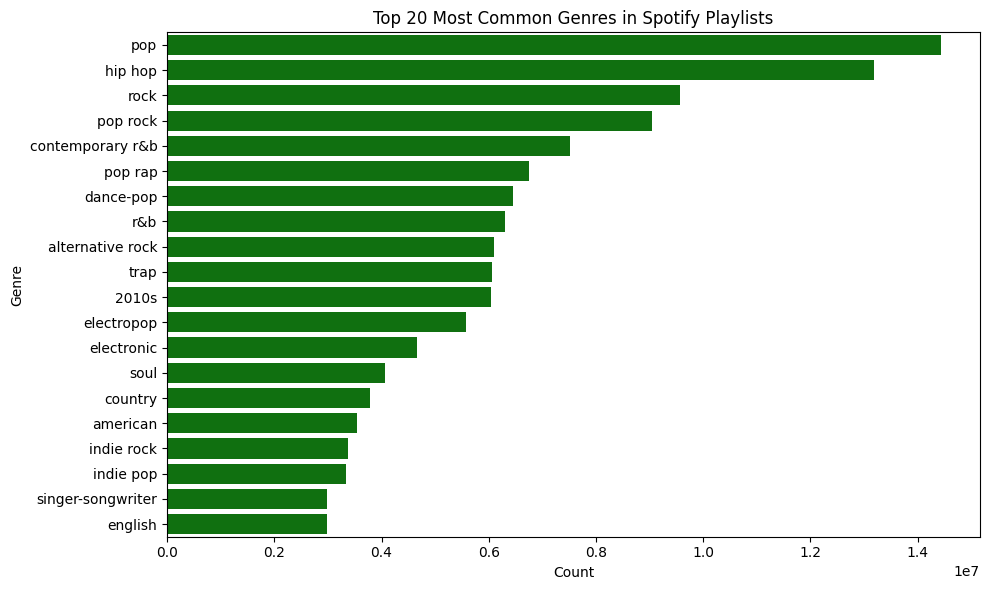

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
genres, counts = zip(*top_20_genres)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=genres, color='green')

plt.title('Top 20 Most Common Genres in Spotify Playlists')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [48]:
all_genres_a = [genre for sublist in unique_artists_df['genres'] for genre in sublist]

genre_counts_a = Counter(all_genres_a)

# Get the top 50 genres
top_20_genres_a = genre_counts_a.most_common(20)

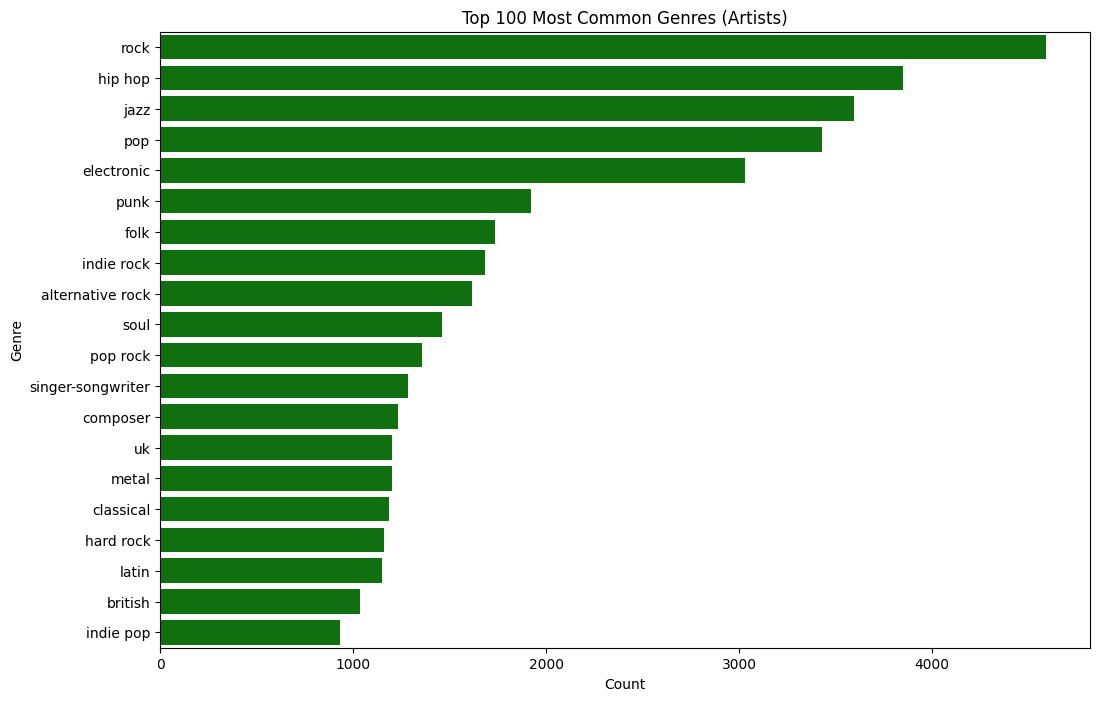

In [51]:
genres, counts = zip(*top_20_genres_a)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=genres, color='green')

plt.title('Top 100 Most Common Genres (Artists)')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [26]:
my_all_genres = playlist_genres_dup.loc[110,'genres']
my_unique_genres = list(set(my_all_genres))
len(my_all_genres)

163

# Recommender System

In [27]:
playlists_genres_df.iloc[110:111]

playlist_pid playlist_name  \
110           110   Brasileiras   

                                                genres  
110  [2000s, rock, world, alternative rock, arrange...

In [28]:
from collections import Counter
my_genre_counts = Counter(my_all_genres)
my_genre_counts

Counter({'mpb': 24,
         'bossa nova': 15,
         'brazilian': 15,
         'latin': 13,
         'singer-songwriter': 6,
         'pop': 5,
         'jazz': 5,
         'música popular brasileira': 5,
         'aln-sh': 4,
         'brazilian rock': 4,
         'reggae': 4,
         'rock': 4,
         'tropicália': 4,
         'brazilian jazz': 4,
         'latin folk': 4,
         'latin jazz': 4,
         'multiple ipi': 4,
         'brasil': 3,
         'brasileiro': 2,
         'politician': 2,
         'pop rock': 2,
         'psychedelic pop': 2,
         'alternative rock': 2,
         'art pop': 2,
         'brazil': 2,
         'samba': 2,
         'playwright': 1,
         'samba-canção': 1,
         'singer': 1,
         'songwriter': 1,
         'writer': 1,
         'world': 1,
         'dance and electronica': 1,
         'arranger': 1,
         'choro': 1,
         'instrumentalist': 1,
         'promessa': 1,
         '1990s': 1,
         '2000s': 1,
         'l

In [8]:
set(my_all_genres).intersection(set(common_genres))

{'2008 universal fire victim',
 'american',
 'blues',
 'british',
 'contemporary r&b',
 'dance',
 'dance-pop',
 'disco',
 'electronic',
 'english',
 'funk',
 'hard rock',
 'hip hop',
 'house',
 'jazz',
 'latin',
 'new wave',
 'pop',
 'pop rap',
 'pop rock',
 'psychedelic rock',
 'punk',
 'r&b',
 'rock',
 'singer-songwriter',
 'soul',
 'synth-pop',
 'synthpop',
 'usa'}

In [15]:
my_vector = []
total_genres = len(my_all_genres)
for genre in common_genres:
    count = my_genre_counts.get(genre, 0) #retrieve the value of key (genres) in the dictionaery Counter
    percentage = (count / total_genres ) * 100
    my_vector.append(percentage)
my_vector = np.array(my_vector)

In [16]:
print(common_genres.index('pop'))
print(my_vector[common_genres.index('pop')])

28
3.067484662576687


In [17]:
similarities = {}
for idx, artist_vector in enumerate(artist_vectors):  
    artist_name = unique_artists_df['artist_name'][idx] 
    similarity = cosine_similarity([my_vector], [artist_vector])  # Calculate cosine similarity
    similarities[artist_name] = similarity[0][0]

In [18]:
sorted_artists = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
print("Recommended Artists:")
for artist, similarity in sorted_artists:
    print(f"{artist}: {similarity:.4f}")

Recommended Artists:
Julio Iglesias: 0.8027
Camilo Sesto: 0.8027
Ivan Lins: 0.8027
Carlos Puebla: 0.7783
Gusttavo Lima: 0.7783
Celso Piña: 0.7783
Chico Buarque: 0.7783
Guillermo Portabales: 0.7783
Darío Gómez: 0.7783
Luiz Gonzaga: 0.7783
Cuco Sánchez: 0.7783
Tirso Duarte: 0.7783
Danny Ocean: 0.7531
Daniel Calveti: 0.7531
Romeo Santos: 0.7531
Zion & Lennox: 0.7531
Farruko: 0.7531
Don Omar: 0.7531
Calibre 50: 0.7531
Lenin Ramírez: 0.7531
El General: 0.7531
Nicky Jam: 0.7531
Ñejo: 0.7531
Ozuna: 0.7531
Santana the Golden Boy: 0.7531
De La Ghetto: 0.7531
Dayme y El High: 0.7531
Jory Boy: 0.7531
Revol: 0.7531
Intocable: 0.7531
Yandel: 0.7531
Wisin: 0.7531
Wisin & Yandel: 0.7531
Buxxi: 0.7531
La Sonora Dinamita: 0.7531
Elvis Crespo: 0.7531
Brytiago: 0.7531
Lenny Tavárez: 0.7531
Andy Rivera: 0.7531
Jacob Forever: 0.7531
Alex Sensation: 0.7531
Frank Reyes: 0.7531
Binomio de Oro de América: 0.7531
Jorge Celedón: 0.7531
Guayacán Orquesta: 0.7531
Eddy Herrera: 0.7531
Joe Arroyo: 0.7531
Chiquito Te

In [23]:
tracks_df[tracks_df['playlist_pid']==110][['playlist_name',	'playlist_pid','artist_name','track_name']].head()

playlist_name  playlist_pid            artist_name  \
21061052   Brasileiras           110                  Skank   
21061053   Brasileiras           110                  Skank   
21061054   Brasileiras           110                  Skank   
21061055   Brasileiras           110  Engenheiros Do Hawaii   
21061056   Brasileiras           110                  Skank   

                                                 track_name  
21061052                                             Te Ver  
21061053                                    Garota Nacional  
21061054                                         Três Lados  
21061055  Era um Garoto, Que Como Eu, Amava os Beatles e...  
21061056                                            Tão Seu

In [24]:
recommended_songs = []  # List to store the recommended songs

top_artists = [artist for artist, similarity in sorted_artists[:5]]  # Top 5 artists with highest similarity
existing_tracks = set(tracks_df[tracks_df['playlist_pid'] == 3]['track_uri'])  # Use set for faster lookups

for artist in top_artists:
    if len(recommended_songs) >= 5:  # Stop if we already have 5 recommended songs
        break

    artist_songs = tracks_df[tracks_df['artist_name'] == artist]  # Get songs by the artist
    artist_songs = artist_songs[~artist_songs['track_uri'].isin(existing_tracks)]  # Remove existing tracks

    if not artist_songs.empty:
        top_song = artist_songs.sample(n=1).iloc[0]  # Randomly select a song
        recommended_songs.append({
            'track_name': top_song['track_name'],
            'artist_name': top_song['artist_name'],
            'album_name': top_song['album_name'],
        })

recommended_songs_df = pd.DataFrame(recommended_songs)

In [25]:
recommended_songs_df 

track_name     artist_name  \
0                       Júrame  Julio Iglesias   
1  Amor Mío ¿Qué Me Has Hecho?    Camilo Sesto   
2                    Vitoriosa       Ivan Lins   
3  El Son de la Alfabetización   Carlos Puebla   
4   Homem de Família - Ao Vivo   Gusttavo Lima   

                           album_name  
0                     México & Amigos  
1                A Voluntad Del Cielo  
2                Nova Bis - Ivan Lins  
3  Perlas Cubanas: Carlos Puebla 1961  
4            50/50 - Ao Vivo (Deluxe)

# My Playlist

In [3]:
myplaylist = pd.read_csv('TramNgoPlaylist.csv')

In [4]:
myplaylist

1rJUbH0v2E8t1GY4OAUTeC  \
0    2QpMK4mvdyFW5N0JYohVdW   
1    7ewfvLrlI0VNht4vEnoTMh   
2    4SJHHpKhcuXwDsCsPqshXj   
3    0AFGP6yJiakwce0evtrbxd   
4    5fwSHlTEWpluwOM0Sxnh5k   
..                      ...   
324  4lH6nENd1y81jp7Yt9lTBX   
325  6NOrpcicPUh2eaj8bAD44u   
326  3kfhS2L56Wj8fBcu7xE47H   
327  5e2f1XLGX2Onj05lxiPfWJ   
328  6rqskah6GlMDlWAvkUym0C   

                                            City Girls  \
0                                       Em Là Châu Báu   
1                                              No Love   
2                                            El Efecto   
3                                            Hoàng Hôn   
4                                                Pepas   
..                                                 ...   
324                                               Solo   
325                               Baby (Is it a Crime)   
326                   Turks & Caicos (feat. 21 Savage)   
327  Don’t Blink Or Stare (feat. Bloodhound Lil Jef...   
328                             ILBB2 (feat. GloRilla)   

                            Chris Brown,Young Thug  \
0                                    tlinh,RPT MCK   
1                        August Alsina,Nicki Minaj   
2                  Rauw Alejandro,Chencho Corleone   
3                                           Cheung   
4                                          Farruko   
..                                             ...   
324                                         Future   
325                                           Rema   
326                             Rod Wave,21 Savage   
327  BloodHound Q50,Bloodhound Lil Jeff,CEO Trayle   
328                              Jorjiana,GloRilla   

    https://open.spotify.com/track/1rJUbH0v2E8t1GY4OAUTeC  \
0    https://open.spotify.com/track/2QpMK4mvdyFW5N0...      
1    https://open.spotify.com/track/7ewfvLrlI0VNht4...      
2    https://open.spotify.com/track/4SJHHpKhcuXwDsC...      
3    https://open.spotify.com/track/0AFGP6yJiakwce0...      
4    https://open.spotify.com/track/5fwSHlTEWpluwOM...      
..                                                 ...      
324  https://open.spotify.com/track/4lH6nENd1y81jp7...      
325  https://open.spotify.com/track/6NOrpcicPUh2eaj...      
326  https://open.spotify.com/track/3kfhS2L56Wj8fBc...      
327  https://open.spotify.com/track/5e2f1XLGX2Onj05...      
328  https://open.spotify.com/track/6rqskah6GlMDlWA...      

     spotify:track:1rJUbH0v2E8t1GY4OAUTeC  
0    spotify:track:2QpMK4mvdyFW5N0JYohVdW  
1    spotify:track:7ewfvLrlI0VNht4vEnoTMh  
2    spotify:track:4SJHHpKhcuXwDsCsPqshXj  
3    spotify:track:0AFGP6yJiakwce0evtrbxd  
4    spotify:track:5fwSHlTEWpluwOM0Sxnh5k  
..                                    ...  
324  spotify:track:4lH6nENd1y81jp7Yt9lTBX  
325  spotify:track:6NOrpcicPUh2eaj8bAD44u  
326  spotify:track:3kfhS2L56Wj8fBcu7xE47H  
327  spotify:track:5e2f1XLGX2Onj05lxiPfWJ  
328  spotify:track:6rqskah6GlMDlWAvkUym0C  

[329 rows x 5 columns]

In [ ]:
column_names = ["track_id", "track_name", "artist_name", "spotify_link", "track_uri"]
my_playlist = pd.read_csv("TramNgoPlaylist.csv", names=column_names, header=None)
my_playlist = my_playlist.drop(columns=['spotify_link'])
print('I listen to',len(my_playlist['artist_name'].unique()),'artists')

In [ ]:
my_playlist['artist_name'] = my_playlist['artist_name'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
my_playlist_exploded = my_playlist.explode('artist_name').reset_index(drop=True)

In [ ]:
myplaylist_genres = pd.merge(my_playlist_exploded, unique_artists_df[['artist_name','genres']], on='artist_name', how='left')
myplaylist_genres = myplaylist_genres.drop_duplicates(subset='artist_name', keep='first')
myplaylist_genres = myplaylist_genres.dropna(subset=['genres'])
myplaylist_genres.head()

In [10]:
my_all_genres = [genre for sublist in myplaylist_genres['genres'] for genre in sublist]
my_unique_genres = list(set(my_all_genres))
len(my_all_genres)

546

In [4]:
common_genres

['alternative metal',
 'disco',
 'indie folk',
 'punk',
 'electronic',
 'blues rock',
 'british',
 'indie pop',
 'indie rock',
 'house',
 'synth-pop',
 'jazz',
 'rap',
 'hip hop',
 'edm',
 'country',
 'metal',
 'reggae',
 'latin pop',
 'latin',
 'usa',
 'trap',
 'blues',
 'alternative',
 'contemporary r&b',
 'punk rock',
 'hard rock',
 'art rock',
 'pop',
 'folk rock',
 'pop rap',
 'funk',
 'rock and indie',
 'english',
 'folk',
 'dance',
 'dream pop',
 'soul',
 'dance-pop',
 'rock',
 'singer-songwriter',
 'electropop',
 'r&b',
 'american',
 'indie',
 'pop rock',
 'alternative rock',
 'synthpop',
 'psychedelic rock',
 '2008 universal fire victim',
 'uk',
 'new wave',
 'pop punk']

In [11]:
from collections import Counter
my_genre_counts = Counter(my_all_genres)
my_genre_counts

Counter({'hip hop': 58,
         'trap': 42,
         'pop': 24,
         'r&b': 23,
         'pop rap': 19,
         'rap': 18,
         'contemporary r&b': 17,
         'reggaeton': 16,
         'latin': 15,
         'latin urban': 13,
         'southern hip hop': 13,
         '2010s': 11,
         'english': 11,
         'alternative r&b': 11,
         'trap latino': 9,
         'dance-pop': 9,
         'electropop': 8,
         '2020s': 7,
         'west coast hip hop': 6,
         '2000s': 5,
         'electronic': 5,
         'latin pop': 5,
         'soul': 5,
         'dance': 4,
         'east coast hip hop': 4,
         'gangsta rap': 4,
         'hardcore hip hop': 4,
         'trap soul': 4,
         'emo rap': 4,
         'cloud rap': 4,
         'hip hop soul': 3,
         'canadian hip hop': 3,
         'relic inn': 3,
         'hip-hop': 3,
         'nuno': 3,
         'pop soul': 3,
         'reggae': 3,
         'alternative hip hop': 3,
         'rage': 3,
         '

In [12]:
len(set(my_all_genres).intersection(set(common_genres)))

32

In [14]:
my_vector = []
total_genres = len(my_all_genres)
for genre in common_genres:
    count = my_genre_counts.get(genre, 0) #retrieve the value of key (genres) in the dictionaery Counter
    percentage = (count / total_genres ) * 100
    my_vector.append(percentage)
my_vector = np.array(my_vector)
my_vector

array([ 0.        ,  0.18315018,  0.        ,  0.18315018,  0.91575092,
        0.        ,  0.18315018,  0.36630037,  0.        ,  0.        ,
        0.36630037,  0.18315018,  3.2967033 , 10.62271062,  0.36630037,
        0.        ,  0.18315018,  0.54945055,  0.91575092,  2.74725275,
        0.        ,  7.69230769,  0.        ,  0.18315018,  3.11355311,
        0.        ,  0.        ,  0.        ,  4.3956044 ,  0.        ,
        3.47985348,  0.18315018,  0.        ,  2.01465201,  0.        ,
        0.73260073,  0.        ,  0.91575092,  1.64835165,  0.18315018,
        0.        ,  1.46520147,  4.21245421,  0.18315018,  0.        ,
        0.36630037,  0.18315018,  0.        ,  0.        ,  0.36630037,
        0.        ,  0.36630037,  0.        ])

In [16]:
print(common_genres.index('hip hop'))
print(my_vector[common_genres.index('hip hop')])

13
10.622710622710622


In [17]:
artist_vectors = []

for artist_genres in unique_artists_df['genres']:
    genre_counts = Counter(artist_genres)  # Count how many times each genre appears in the artist's genres list
    total_genres = len(artist_genres)  # Total number of genres for the artist
    vector_a = []
    for genre in common_genres:
        count = genre_counts.get(genre, 0)  # Get the count for the genre (default to 0 if not present)
        percentage = (count / total_genres) * 100  # Calculate percentage
        vector_a.append(percentage)  # Append the result

    artist_vectors.append(vector_a)  # Append the artist's genre vector
artist_vectors = np.array(artist_vectors)

In [18]:
cosine_similarity([my_vector], [artist_vectors[0]])

array([[0.67811815]])

## COSINE SIMILARTITY

In [19]:
similarities = {}
for idx, artist_vector in enumerate(artist_vectors):  
    artist_name = unique_artists_df['artist_name'][idx] 
    similarity = cosine_similarity([my_vector], [artist_vector])  # Calculate cosine similarity
    similarities[artist_name] = similarity[0][0]

In [21]:
sorted_artists = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
print("Recommended Artists:")
for artist, similarity in sorted_artists:
    print(f"{artist}: {similarity:.4f}")

Recommended Artists:
Drake: 0.8442
Ronnie Lott: 0.8442
Rufus Blaq: 0.8305
Fergie: 0.8200
Kendrick Lamar: 0.8136
Doja Cat: 0.8136
Angelou: 0.8119
Cardi B: 0.8090
Sarahmée: 0.8090
Big Sean: 0.8085
Princess Nokia: 0.8024
Cruz Cafuné: 0.8024
Ebony: 0.8024
Chi: 0.8024
JayDaReal: 0.8023
Emil: 0.8023
21 Savage: 0.7990
2 Chainz: 0.7990
UGK: 0.7990
Lil Peep: 0.7990
RAMIREZ: 0.7990
Mike Smiff: 0.7990
Trippie Redd: 0.7990
Migos: 0.7990
Gucci Mane: 0.7990
A$AP Ferg: 0.7990
Lil Yachty: 0.7990
Metro Boomin: 0.7990
A$AP Mob: 0.7990
MadeinTYO: 0.7990
Meek Mill: 0.7990
Lil Pump: 0.7990
Smokepurpp: 0.7990
G Herbo: 0.7990
Philthy Rich: 0.7990
ScHoolboy Q: 0.7990
IDK: 0.7990
Yung Lean: 0.7990
Bas: 0.7990
Keys N Krates: 0.7990
Yellow Claw: 0.7990
Jeezy: 0.7990
Young Dolph: 0.7990
Moneybagg Yo: 0.7990
Higher Brothers: 0.7990
Famous Dex: 0.7990
Boosie Badazz: 0.7990
Flosstradamus: 0.7990
Juicy J: 0.7990
Lil Bibby: 0.7990
Rowdy Rebel: 0.7990
Rvssian: 0.7990
Offset: 0.7990
Bino Rideaux: 0.7990
Blac Youngsta: 0

In [24]:
recommended_songs = []  # List to store the recommended songs

top_artists = [artist for artist, similarity in sorted_artists[:5]]  # Top 5 artists who has highest cosine similarity
existing_tracks = myplaylist_genres['track_uri'].values
for artist in top_artists:
    if len(recommended_songs) >= 5:  # Check if we already have 5 recommended songs
        break
    artist_songs = tracks_df[tracks_df['artist_name'] == artist]
    artist_songs = artist_songs[~artist_songs['track_uri'].isin(existing_tracks)]  # filter out the songs already in playlist
    
 
    if not artist_songs.empty:
        top_song = artist_songs.sample(n=1).iloc[0] # recommend random songs from the artists. 
        recommended_songs.append({
            'track_name': top_song['track_name'],
            'artist_name': top_song['artist_name'],
            'album_name': top_song['album_name'],
        })
recommended_songs_df = pd.DataFrame(recommended_songs)

In [25]:
recommended_songs_df

track_name     artist_name  \
0             Worst Behavior           Drake   
1                Kriss Kross     Ronnie Lott   
2                  2 da Head      Rufus Blaq   
3                  Glamorous          Fergie   
4  untitled 07 | 2014 - 2016  Kendrick Lamar   

                                          album_name  
0                               Nothing Was The Same  
1                                        Kriss Kross  
2  Total Frat Movie (Original Motion Picture Soun...  
3                                       The Dutchess  
4                               untitled unmastered.

# Another Playlist Playlist

In [4]:
myplaylist = pd.read_csv('/home/jovyan/Spotify/PlaylistToTest/Zay_Dam_Tinh_te.csv')

### Display The Playlist

In [5]:
myplaylist

Track URI  \
0   spotify:track:7v0s1xp3JxtUUVNOVjZ2me   
1   spotify:track:6ROgCbOoolJMfe0bBHOIib   
2   spotify:track:1JMzL8o6YSLGZXoSnt8NdL   
3   spotify:track:3rtOU0GwlsbCNiCqEDLZUN   
4   spotify:track:7uYu6IcsoYviH4cYxSclF4   
5   spotify:track:3QjcsqERv4IfmopRvXFoWB   
6   spotify:track:1TcmqSx576eBcuTxTtcEAk   
7   spotify:track:1BD3AOAttsy8P9BZKwdpB3   
8   spotify:track:3COYA2vgfcUhDyRlVpZy5p   
9   spotify:track:2ctmaWoBxLBYiZB7AKmK1D   
10  spotify:track:6ecdnYq7ob5tvxlT3U2xwV   
11  spotify:track:0Y2ipMuhAlOnIkTXcCKWlL   
12  spotify:track:27AEQr4wqfHyVpwgFgnGs6   
13  spotify:track:2IkuaJyHXIEfFfwnJb9aoB   
14  spotify:track:6Ov6L8Iy0SMEl9w1TOUvaG   
15  spotify:track:5cml547MByVlaVrKU2lJTg   
16  spotify:track:2klsSb2iTfgDh95Ak9uWY2   
17  spotify:track:0ReId5SRMspb6ISw0rBsBN   
18  spotify:track:2OBZtEg8DXhICWYd6yvicf   
19  spotify:track:3nw5vYaH4qVx8joq3qhtNx   
20  spotify:track:4br9EerdxCl7n0me6PLPQL   
21  spotify:track:0H9DTbF1fnq2xzmPHo3Lnh   
22  spotify:track:1pqfAfDly9K072HLeONS7c   
23  spotify:track:7xikKiHGMEQPYbrNSW8vP9   
24  spotify:track:4eeflgjzTF8xN8U2E0dech   
25  spotify:track:4fyOceNe8LU4eYDVOX7z4A   
26  spotify:track:35gc5FTZehQ5DF2BI6wkgf   
27  spotify:track:3oIKYROTi2wREKdnqq3yAp   
28  spotify:track:5lN7UtvhpwEHzifSjKw3z2   
29  spotify:track:4LAdZsiks8vsw3e1iZQgVY   
30  spotify:track:6vvPecFTmWxDfEJ6cYT1wa   
31  spotify:track:2naHX4cacns359w3ugyt3P   
32  spotify:track:5vNRhkKd0yEAg8suGBpjeY   
33  spotify:track:2dJsq7g1lxB60OsaoOzO1o   
34  spotify:track:7len778YJVqS6VHtUZ9SrG   
35  spotify:track:6IE2BmKjlOejXC2ySSGkEX   
36  spotify:track:4CrTXVuKQnFlIoscIDgMCq   
37  spotify:track:1R7i8K6xxhgyS4yOfrNaAP   
38  spotify:track:52DD3C1dw5rE32lhtbfbLW   
39  spotify:track:2DzFmWhrnRHROJuxW5e1t2   
40  spotify:track:4xKCSDQ4XeqWHL6iHnTIiy   
41  spotify:track:37GNTP4wB0QSkUwcTWLHKg   
42  spotify:track:1cbLoF2FHZrdcAuH28eZ97   
43  spotify:track:1KxXkPa3hO9WZqiIiOb5TJ   
44  spotify:track:6LrnlU8TeaogIewiYNzf7s   
45  spotify:track:7lbqOBEKTZUmM1FhB3cPc0   
46  spotify:track:4Oun2ylbjFKMPTiaSbbCih   
47  spotify:track:0NZPBYD5qbEWRs3PrGiRkT   
48  spotify:track:4SUk1ZTtA6OC120afxrpRZ   
49  spotify:track:23uUytja1B1mUOOIoygf6u   
50  spotify:track:3tmRCpxxyeyccyCQLA1VqL   
51  spotify:track:4Pm7RdCLyHOy4mtrKayIyp   
52  spotify:track:7iantF9kTBxLyu3RxxGig7   
53  spotify:track:3h8jLI0xVkqCS7arcrSThZ   
54  spotify:track:12rIwDpMKwx77nV5O998nB   
55  spotify:track:6ImWeruCQWxZ9WNodYwjvg   
56  spotify:track:5AsZiMkbxLlR68WM3HHKWZ   
57  spotify:track:2jlg4nL2t1Ar5snduW9H4b   
58  spotify:track:7Kk581xmajJZNYit8Ssrtd   

                                         Track Name  \
0                                      Nhất Bạn Rồi   
1                                              GANG   
2                                         nguyên xi   
3                                      Tim Anh Ghen   
4                                              6262   
5                                           DÂU TẰM   
6                                              NGÂN   
7                                    HOP ON DA SHOW   
8                                     PHÓNG ZÌN ZÌN   
9                                          Bảo Tàng   
10                                           Nu Cep   
11                                        Get Money   
12                                           Mời Em   
13                                        Truy Lùng   
14                                          Vinflow   
15                                            Em iu   
16                                     Gái Độc Thân   
17                                              CUA   
18                     Từ A Đến Z (feat. 24k.Right)   
19                                        Okeokeoke   
20                                         Mắt Xanh   
21                                            Ổ Quỷ   
22                                         Slatt ON   
23                                          Chơi Đồ   
24             

### Recommendation Steps

In [6]:
myplaylist= myplaylist.rename(columns={'Track URI':'track_uri', 'Artist Name(s)':'artist_name'})

In [7]:
myplaylist['artist_name'] = myplaylist['artist_name'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
myplaylist['artist_name'] = myplaylist['artist_name'].apply(lambda x: [artist.strip() for artist in x] if isinstance(x, list) else x)
my_playlist_exploded = myplaylist.explode('artist_name').reset_index(drop=True)

In [8]:
my_playlist_exploded

track_uri                    Track Name  \
0    spotify:track:7v0s1xp3JxtUUVNOVjZ2me                  Nhất Bạn Rồi   
1    spotify:track:6ROgCbOoolJMfe0bBHOIib                          GANG   
2    spotify:track:6ROgCbOoolJMfe0bBHOIib                          GANG   
3    spotify:track:1JMzL8o6YSLGZXoSnt8NdL                     nguyên xi   
4    spotify:track:1JMzL8o6YSLGZXoSnt8NdL                     nguyên xi   
..                                    ...                           ...   
107  spotify:track:5AsZiMkbxLlR68WM3HHKWZ                            29   
108  spotify:track:5AsZiMkbxLlR68WM3HHKWZ                            29   
109  spotify:track:2jlg4nL2t1Ar5snduW9H4b                 Con Trai Cưng   
110  spotify:track:7Kk581xmajJZNYit8Ssrtd  KHÔNG SAO CẢ (feat. 7dnight)   
111  spotify:track:7Kk581xmajJZNYit8Ssrtd  KHÔNG SAO CẢ (feat. 7dnight)   

                Album Name   artist_name Release Date  Duration (ms)  \
0             Nhất Bạn Rồi         Sambi   2021-12-13         137999   
1                     GANG      Anh Phan   2024-11-16         127384   
2                     GANG  Pilgrim Raid   2024-11-16         127384   
3                nguyên xi          Lãng   2024-02-07         168888   
4                nguyên xi        NamLee   2024-02-07         168888   
..                     ...           ...          ...            ...   
107            THE WXRDIES        Wxrdie   2024-11-12         158154   
108            THE WXRDIES  Mason Nguyen   2024-11-12         158154   
109          Con Trai Cưng         B Ray   2023-05-16         158801   
110  RAP VIỆT 2024, Tập 10      RAP VIỆT   2024-11-25         249083   
111  RAP VIỆT 2024, Tập 10       7dnight   2024-11-25         249083   

     Popularity                      Added By              Added At  \
0            18  31d7xkcz5vrls5wea4z2h577hvla  2024-12-08T02:04:36Z   
1            36  31d7xkcz5vrls5wea4z2h577hvla  2024-12-08T02:05:05Z   
2            36  31d7xkcz5vrls5wea4z2h577hvla  2024-12-08T02:05:05Z   
3            40  31d7xkcz5vrls5wea4z2h577hvla  2024-12-08T02:06:23Z   
4            40  31d7xkcz5vrls5wea4z2h577hvla  2024-12-08T02:06:23Z   
..          ...                           ...                   ...   
107          53  31d7xkcz5vrls5wea4z2h577hvla  2024-12-15T03:22:50Z   
108          53  31d7xkcz5vrls5wea4z2h577hvla  2024-12-15T03:22:50Z   
109          33  31d7xkcz5vrls5wea4z2h577hvla  2025-01-09T05:59:59Z   
110          57  31d7xkcz5vrls5wea4z2h577hvla  2025-05-13T22:06:12Z   
111          57  31d7xkcz5vrls5wea4z2h577hvla  2025-05-13T22:06:12Z   

                                                Genres  ... Key  Loudness  \
0                   vietnamese hip hop,v-pop,vinahouse  ...   1    -5.844   
1               vietnamese hip hop,v-pop,vietnam indie  ...   1   -12.466   
2               vietnamese hip hop,v-pop,vietnam indie  ...   1   -12.466   
3    vietnamese hip hop,v-pop,vietnamese lo-fi,viet...  ...   6   -11.538   
4    vietnamese hip hop,v-pop,vietnamese lo-fi,viet...  ...   6   -11.538   
..                                                 ...  ...  ..       ...   
107                           vietnamese hip hop,v-pop  ...   1    -4.797   
108                           vietnamese hip hop,v-pop  ...   1    -4.797   
109   vietnamese hip hop,v-pop,vinahouse,vietnam indie  ...   0    -5.071   
110                           vietnamese hip hop,v-pop  ...   7    -3.383   
111                           vietnamese hip hop,v-pop  ...   7    -3.383   

     Mode  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
0       0       0.3660        0.0593          0.001530    0.0973    0.843   
1       1       0.2350        0.6350          0.045300    0.2400    0.222   
2       1       0.2350        0.6350          0.045300    0.2400    0.222   
3       0       0.0709        0.2780          0.000052    0.0961    0.815   
4       0       0.0709        0.2780          0.000052    0.0961    0.815   
..    ...          ...    

In [9]:
myplaylist_genres = pd.merge(my_playlist_exploded, unique_artists_df[['artist_name','genres']], on='artist_name', how='left')
myplaylist_genres = myplaylist_genres.drop_duplicates(subset='artist_name', keep='first')
myplaylist_genres = myplaylist_genres.dropna(subset=['genres'])

In [10]:
myplaylist_genres

track_uri                       Track Name  \
63  spotify:track:5vNRhkKd0yEAg8suGBpjeY                             APT.   
89  spotify:track:4Oun2ylbjFKMPTiaSbbCih  WAP (feat. Megan Thee Stallion)   
90  spotify:track:4Oun2ylbjFKMPTiaSbbCih  WAP (feat. Megan Thee Stallion)   
91  spotify:track:0NZPBYD5qbEWRs3PrGiRkT        Unholy (feat. Kim Petras)   
93  spotify:track:0NZPBYD5qbEWRs3PrGiRkT        Unholy (feat. Kim Petras)   

                         Album Name          artist_name Release Date  \
63                             APT.           Bruno Mars   2024-10-18   
89  WAP (feat. Megan Thee Stallion)              Cardi B   2020-08-07   
90  WAP (feat. Megan Thee Stallion)  Megan Thee Stallion   2020-08-07   
91                           Gloria            Sam Smith   2023-01-27   
93                           Gloria           Kim Petras   2023-01-27   

    Duration (ms)  Popularity                      Added By  \
63         169917          95  31d7xkcz5vrls5wea4z2h577hvla   
89         187541          78  31d7xkcz5vrls5wea4z2h577hvla   
90         187541          78  31d7xkcz5vrls5wea4z2h577hvla   
91         156943          76  31d7xkcz5vrls5wea4z2h577hvla   
93         156943          76  31d7xkcz5vrls5wea4z2h577hvla   

                Added At    Genres  ... Loudness  Mode  Speechiness  \
63  2024-12-08T05:09:19Z     k-pop  ...   -4.477     0       0.2600   
89  2024-12-13T02:58:45Z       NaN  ...   -7.509     1       0.3750   
90  2024-12-13T02:58:45Z       NaN  ...   -7.509     1       0.3750   
91  2024-12-13T06:56:08Z  soft pop  ...   -7.384     1       0.0707   
93  2024-12-13T06:56:08Z  soft pop  ...   -7.384     1       0.0707   

    Acousticness  Instrumentalness  Liveness  Valence    Tempo  \
63        0.0283          0.000000    0.3550    0.939  149.027   
89        0.0194          0.000000    0.0824    0.357  133.073   
90        0.0194          0.000000    0.0824    0.357  133.073   
91        0.0138          0.000005    0.3180    0.224  131.007   
93        0.0138          0.000005    0.3180    0.224  131.007   

    Time Signature                                             genres  
63               4  [2010s, funk, music for soccer moms, pop, r&b,...  
89               4  [alternative pop, awful, east coast hip hop, h...  
90               4  [english, hip hop, pop rap, rap, southern hip ...  
91               4  [alliteration, alternative r&b, blue-eyed soul...  
93               4  [dance, dance-pop, electropop, pop, queer, syn...  

[5 rows x 24 columns]

In [11]:
my_all_genres = [genre for sublist in myplaylist_genres['genres'] for genre in sublist]
my_unique_genres = list(set(my_all_genres))
len(my_all_genres)

39

In [12]:
from collections import Counter
my_genre_counts = Counter(my_all_genres)
my_genre_counts

Counter({'pop': 4,
         'soul': 2,
         'hip hop': 2,
         'trap': 2,
         'english': 2,
         'queer': 2,
         '2010s': 1,
         'funk': 1,
         'music for soccer moms': 1,
         'r&b': 1,
         'relic inn': 1,
         'rock': 1,
         'alternative pop': 1,
         'awful': 1,
         'east coast hip hop': 1,
         'late 2010s': 1,
         'pop rap': 1,
         'rap': 1,
         'southern hip hop': 1,
         'alliteration': 1,
         'alternative r&b': 1,
         'blue-eyed soul': 1,
         'lgbtqi': 1,
         'nuno': 1,
         'pop soul': 1,
         'synth funk': 1,
         'dance': 1,
         'dance-pop': 1,
         'electropop': 1,
         'synth-pop': 1,
         'transgender': 1})

In [17]:
my_vector = []
total_genres = len(my_all_genres)
for genre in common_genres:
    count = my_genre_counts.get(genre, 0) #retrieve the value of key (genres) in the dictionaery Counter
    percentage = (count / total_genres ) * 100
    my_vector.append(percentage)
my_vector = np.array(my_vector)
my_vector

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        2.56410256,  0.        ,  2.56410256,  5.12820513,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  5.12820513,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , 10.25641026,  0.        ,
        2.56410256,  2.56410256,  0.        ,  5.12820513,  0.        ,
        2.56410256,  0.        ,  5.12820513,  2.56410256,  2.56410256,
        0.        ,  2.56410256,  2.56410256,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [18]:
print(common_genres.index('jazz'))
print(my_vector[common_genres.index('jazz')])

11
0.0


In [19]:
artist_vectors = []

for artist_genres in unique_artists_df['genres']:
    genre_counts = Counter(artist_genres)  # Count how many times each genre appears in the artist's genres list
    total_genres = len(artist_genres)  # Total number of genres for the artist
    vector_a = []
    for genre in common_genres:
        count = genre_counts.get(genre, 0)  # Get the count for the genre (default to 0 if not present)
        percentage = (count / total_genres) * 100  # Calculate percentage
        vector_a.append(percentage)  # Append the result

    artist_vectors.append(vector_a)  # Append the artist's genre vector
artist_vectors = np.array(artist_vectors)

In [20]:
similarities = {}
for idx, artist_vector in enumerate(artist_vectors):  
    artist_name = unique_artists_df['artist_name'][idx] 
    similarity = cosine_similarity([my_vector], [artist_vector])  # Calculate cosine similarity
    similarities[artist_name] = similarity[0][0]

In [21]:
sorted_artists = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
print("Recommended Artists:")
for artist, similarity in sorted_artists:
    print(f"{artist}: {similarity:.4f}")

Recommended Artists:
Angelou: 0.7651
Cardi B: 0.7213
Sam Smith: 0.7213
Duncan James: 0.7213
Sarahmée: 0.7213
Mariah Carey: 0.7083
Amerie: 0.7028
Rufus Blaq: 0.7028
Stella Mwangi: 0.7028
KNLO: 0.7028
Lil Wayne: 0.7013
Kendrick Lamar: 0.6984
CeeLo Green: 0.6984
Doja Cat: 0.6984
Rudimental: 0.6626
Bill Medley: 0.6626
The Platters: 0.6626
Young Fathers: 0.6626
Badass Wolf Shirt: 0.6626
Bridgit Mendler: 0.6626
Timeflies: 0.6626
BTS: 0.6626
Jon Bellion: 0.6626
Meghan Trainor: 0.6626
Daniel Powter: 0.6626
Nico & Vinz: 0.6626
Kalin and Myles: 0.6626
BIGBANG: 0.6626
BLACKPINK: 0.6626
Classics IV: 0.6626
Alain Clark: 0.6626
Sam Sparro: 0.6626
Nessi: 0.6626
Brook Benton: 0.6626
Dawn Richard: 0.6626
Ella May Saison: 0.6626
Nick Lachey: 0.6626
Michael Schulte: 0.6626
Sam Tsui: 0.6626
Dee Dee Sharp: 0.6626
Miss Li: 0.6626
Babe Rainbow: 0.6626
Johnny & Jackey: 0.6626
Amandine Bourgeois: 0.6626
Gustavo: 0.6626
Veronica Maggio: 0.6626
Sandro Cavazza: 0.6626
Amanda Delara: 0.6626
Babeo Baggins: 0.6626
B

## Result

In [22]:
recommended_songs = []  # List to store the recommended songs

top_artists = [artist for artist, similarity in sorted_artists[:5]]  # Top 5 artists who has highest cosine similarity
existing_tracks = myplaylist_genres['track_uri'].values
for artist in top_artists:
    if len(recommended_songs) >= 5:  # Check if we already have 5 recommended songs
        break
    artist_songs = tracks_df[tracks_df['artist_name'] == artist]
    artist_songs = artist_songs[~artist_songs['track_uri'].isin(existing_tracks)]  # filter out the songs already in playlist
    
 
    if not artist_songs.empty:
        top_song = artist_songs.sample(n=1).iloc[0] # recommend random songs from the artists. 
        recommended_songs.append({
            'track_name': top_song['track_name'],
            'artist_name': top_song['artist_name'],
            'album_name': top_song['album_name'],
        })
recommended_songs_df = pd.DataFrame(recommended_songs)

In [23]:
recommended_songs_df

track_name   artist_name          album_name
0  I Will Never - Original Mix       Angelou        I Will Never
1                 Bodak Yellow       Cardi B        Bodak Yellow
2         I'm Not The Only One     Sam Smith  In The Lonely Hour
3                       Amazed  Duncan James         Future Past
4                        Déter      Sarahmée            Légitime